In [87]:
import pandas as pd

In [88]:
df = pd.read_csv("spam.csv", encoding = "ISO-8859-1")

In [89]:
df["v2"] = df["v2"].str.lower()
df["v2"]

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: v2, Length: 5572, dtype: object

In [90]:
df[df["v1"] == "spam"]["v2"].to_csv("spam", index=None)

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_df=0.99,
    min_df=0.01,
    strip_accents="ascii",
    decode_error="replace"
)
X = vectorizer.fit_transform(df["v2"])
vectorizer.get_feature_names_out()
count_df = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out())

In [92]:
columns = list(count_df.sum().sort_values(ascending=False).index.values)

In [93]:
columns

['you',
 'to',
 'the',
 'in',
 'is',
 'and',
 'me',
 'my',
 'your',
 'it',
 'for',
 'call',
 'that',
 'of',
 'have',
 'are',
 'now',
 'on',
 'ok',
 'so',
 'not',
 'can',
 'no',
 'at',
 'or',
 'but',
 'do',
 'ur',
 'will',
 'just',
 'we',
 'get',
 'with',
 'how',
 'be',
 'what',
 'this',
 'if',
 'up',
 'll',
 'when',
 'gt',
 'lt',
 'go',
 'then',
 'got',
 'from',
 'out',
 'good',
 'free',
 'am',
 'all',
 'come',
 'like',
 'there',
 'know',
 'its',
 'he',
 'lor',
 'time',
 'only',
 'was',
 'home',
 'da',
 'going',
 'sorry',
 'day',
 'want',
 'still',
 'send',
 'love',
 'text',
 'later',
 'today',
 'one',
 'see',
 'as',
 'need',
 'txt',
 'by',
 'about',
 'back',
 'dont',
 'take',
 'she',
 'oh',
 'i_',
 'dear',
 'where',
 'don',
 'well',
 'please',
 'wat',
 'new',
 'did',
 'any',
 'hey',
 'stop',
 'here',
 'pls',
 'tell',
 'some',
 'reply',
 'hi',
 'phone',
 'yes',
 'too',
 'our',
 'mobile',
 'been',
 'think',
 'great',
 'they',
 're',
 'much',
 'week',
 'yeah',
 'her',
 'him',
 'already',

<Axes: >

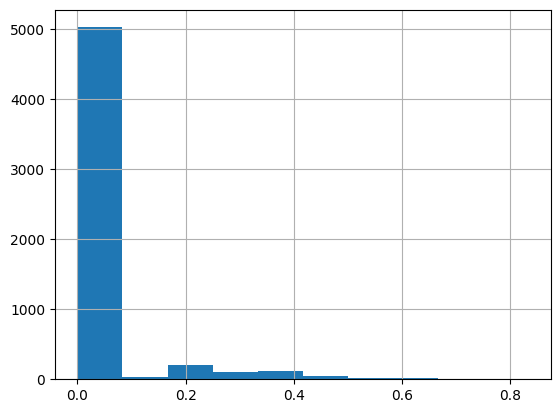

In [94]:
count_df["call"].hist()

In [95]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"go until jurong point, crazy.. available only ...",NaN,NaN,NaN
1,ham,ok lar... joking wif u oni...,NaN,NaN,NaN
2,spam,free entry in 2 a wkly comp to win fa cup fina...,NaN,NaN,NaN
3,ham,u dun say so early hor... u c already then say...,NaN,NaN,NaN
4,ham,"nah i don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,will ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"pity, * was in mood for that. so...any other s...",NaN,NaN,NaN
5570,ham,the guy did some bitching but i acted like i'd...,NaN,NaN,NaN


In [96]:
#
count_df = count_df[columns]
count_df["label"] = df["v1"]

In [97]:
count_df

,you,to,the,in,is,and,me,my,your,it,...,contact,50,service,per,money,feel,someone,always,even,label
0,0.0,0.000000,0.000000,0.258913,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,ham
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,ham
2,0.0,0.559788,0.000000,0.248877,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,spam
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,ham
4,0.0,0.161997,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.000000,0.298917,0.000000,0.334218,0.000000,0.0,0.0,0.0,0.000000,...,0.299633,0.0,0.0,0.309284,0.0,0.0,0.0,0.0,0.0,spam
5568,0.0,0.238387,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,ham
5569,0.0,0.000000,0.000000,0.319167,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,ham
5570,0.0,0.128502,0.157188,0.171392,0.000000,0.172268,0.0,0.0,0.0,0.188231,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,ham


In [98]:
import seaborn as sns

c:\Users\seanh\.conda\envs\asid\lib\site-packages\seaborn\_base.py:1000: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  comp = pd.to_numeric(converter.convert_units(orig)).astype(float)


<Axes: xlabel='sorry', ylabel='Count'>

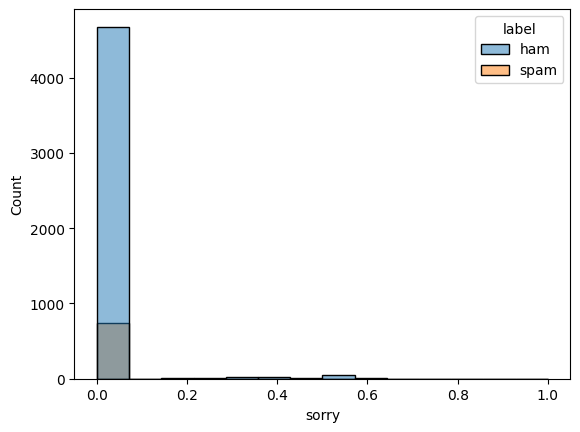

In [99]:
sns.histplot(data=count_df, x="sorry", hue="label")

c:\Users\seanh\.conda\envs\asid\lib\site-packages\seaborn\_base.py:1000: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  comp = pd.to_numeric(converter.convert_units(orig)).astype(float)


<Axes: xlabel='call', ylabel='Count'>

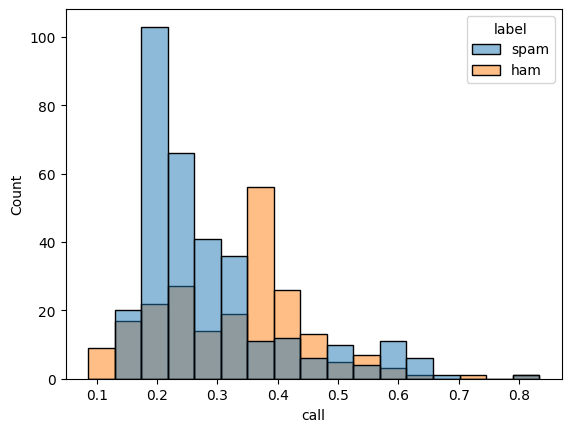

In [100]:
col = "call"

sns.histplot(data=count_df[count_df[col] > 0], x=col, hue="label")

In [101]:
count_df.to_csv("tidif_counts.csv")

C:\Users\seanh\AppData\Local\Temp\ipykernel_6124\550049904.py:1: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  count_df.to_csv("tidif_counts.csv")


In [102]:
count_df.max()

you             1.0
to              1.0
the             1.0
in              1.0
is              1.0
             ...   
feel       0.694228
someone    0.757843
always     0.667049
even       0.647814
label          spam
Length: 215, dtype: object